# Combined Notebook: Data Cleaning, EDA

## 1.0 Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

# Optional: Display settings for Pandas and Plots
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
sns.set_style('whitegrid')

print("Imports complete.")

Imports complete.


## 1.1 Data Loading

In [ ]:
# Note: Replace '../CW1_train.csv' with your actual dataset filename if different.
df = pd.read_csv('../CW1_train.csv')

# Preview the first few rows of the dataset
df.head()

outcome  carat        cut color clarity  depth  table  price     x     y     z        a1        a2        a3        a4        a5        b1        b2        b3        b4        b5        a6        a7        a8        a9       a10        b6        b7        b8        b9       b10
0 -26.701232   1.14      Ideal     G     VS1   62.3   56.0   7948  6.73  6.70  4.18  0.709585  0.385796  0.267058  0.500222  0.462145  0.806922  0.891912  0.276683  0.967510  0.131087  0.168836 -0.273758  1.107832  1.247795  0.482344  0.489511 -0.321138  0.573382  0.446871 -1.990581
1   6.548093   0.38    Premium     H     VS2   60.5   59.0    898  4.69  4.66  2.83  0.649532  0.037578  0.618528  0.052079  0.008600  0.496153  0.092878  0.089039  0.321334  0.549223 -0.256549  0.315373 -0.030326 -0.114335 -1.059588 -1.761360 -1.343951 -1.002550 -0.225030 -0.446653
2   6.612562   0.50  Very Good     E     SI1   60.7   58.0   1351  5.09  5.13  3.10  0.550496  0.029469  0.350697  0.131802  0.317685  0.821415  0.581294  0.876056  0.743479  0.916367 -1.193327 -0.657307 -0.591726 -0.446856 -0.765286 -0.816544 -1.397794 -0.477130  0.810509  1.725131
3  -5.073562   0.70    Premium     D     SI1   61.2   58.0   2512  5.74  5.70  3.50  0.982447  0.487176  0.339991  0.232601  0.267207  0.800913  0.984788  0.070506  0.528945  0.005256 -1.740788 -1.778860 -0.825070  0.444932  1.173109  0.453606 -0.263440  0.246210 -0.850503 -0.412950
4 -14.436557   0.83      Ideal     G     SI2   62.4   54.0   2751  6.01  6.08  3.77  0.030877  0.818540  0.955872  0.923147  0.861377  0.997349  0.091662  0.781069  0.019354  0.522191 -0.859322  1.409268  0.861992  1.109063 -1.436722 -1.461618  0.081787  0.258087  0.851146  2.204813

## 2.0 Data Cleaning

### 2.1 Basic Checks & Cleaning

In [4]:
# Check shape and info
print("Initial Data Shape:", df.shape)
df.info()

# Check for duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
if num_duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
    print("Current Data Shape (after removing duplicates):", df.shape)
else:
    print("No duplicates found.")
    print("Current Data Shape:", df.shape)

Initial Data Shape: (10000, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   outcome  10000 non-null  float64
 1   carat    10000 non-null  float64
 2   cut      10000 non-null  object 
 3   color    10000 non-null  object 
 4   clarity  10000 non-null  object 
 5   depth    10000 non-null  float64
 6   table    10000 non-null  float64
 7   price    10000 non-null  int64  
 8   x        10000 non-null  float64
 9   y        10000 non-null  float64
 10  z        10000 non-null  float64
 11  a1       10000 non-null  float64
 12  a2       10000 non-null  float64
 13  a3       10000 non-null  float64
 14  a4       10000 non-null  float64
 15  a5       10000 non-null  float64
 16  b1       10000 non-null  float64
 17  b2       10000 non-null  float64
 18  b3       10000 non-null  float64
 19  b4       10000 non-null  float64
 20  b5       10000 non-

### 2.2 Handling Missing Values

In [8]:
# Check how many missing values per column
missing_values = df.isna().sum()
print("\nMissing values per column:\n", missing_values)



Missing values per column:
 outcome    0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
a1         0
a2         0
a3         0
a4         0
a5         0
b1         0
b2         0
b3         0
b4         0
b5         0
a6         0
a7         0
a8         0
a9         0
a10        0
b6         0
b7         0
b8         0
b9         0
b10        0
dtype: int64


### 2.3 Basic Statistics / Outlier Detection

In [ ]:
# 1.Get a quick statistical summary
df.describe()
# 2. Boxplot for Outlier Detection
plt.figure(figsize=(12, 6))
df.boxplot(column=['outcome', 'price_log', 'depth', 'carat'])
plt.title("Boxplot of Outcome and Key Features")
plt.show()

outcome         carat         depth         table         price             x             y             z            a1            a2            a3            a4            a5            b1            b2            b3            b4            b5            a6            a7            a8            a9           a10            b6            b7            b8            b9           b10
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000
mean      -4.979081      0.798407     61.748060     57.467360   3910.841900      5.733974      5.741665      3.540757      0.502349      0.507509      0.503561      0.501449      0.500618      0.500001      0.500075      0.500901      0.503297      0.499672     -0.011806     -0.009992     -0.021856     -0.009286     -0.012731     -0.007407     -0.002919     -0.015392      0.000051     -0.008890
std       12.722224      0.472046      1.429631      2.247036   3940.369616      1.114850      1.228057      0.692502      0.291012      0.291207      0.289080      0.288287      0.289008      0.287718      0.289193      0.290479      0.286463      0.288709      0.999700      1.000633      1.010847      1.010200      1.003570      0.997181      0.992112      0.991442      1.005808      1.005258
min      -44.879471      0.200000     50.800000     44.000000    326.000000      0.000000      0.000000      0.000000      0.000128      0.000101      0.000176      0.000101      0.000166      0.000231      0.000048      0.000045      0.000032      0.000102     -3.750688     -3.701252     -3.810713     -3.549324     -3.532430     -3.740254     -3.987845     -4.244733     -3.649063     -3.862407
25%      -13.989962      0.400000     61.000000     56.000000    965.000000      4.730000      4.740000      2.920000      0.249922      0.251350      0.253052      0.254204      0.249160      0.250781      0.247083      0.247653      0.260335      0.249919     -0.672814     -0.697088     -0.696779     -0.674015     -0.681433     -0.687482     -0.666360     -0.678384     -0.667726     -0.680576
50%       -5.442794      0.710000     61.900000     57.000000   2441.000000      5.700000      5.720000      3.530000      0.502063      0.510046      0.505308      0.501914      0.500035      0.502025      0.500868      0.504009      0.502572      0.496931     -0.013058      0.000265     -0.005496     -0.010254     -0.017385      0.001915      0.022894     -0.009743     -0.010082     -0.016215
75%        3.918593      1.040000     62.500000     59.000000   5226.000000      6.530000      6.530000      4.030000      0.753191      0.764731      0.751173      0.750727      0.753462      0.746049      0.753943      0.753614      0.754412      0.751391      0.640883      0.673117      0.645305      0.669159      0.671203      0.659154      0.654947      0.653020      0.684738      0.656871
max       39.675966      4.000000     70.500000     73.000000  18791.000000     10.010000     58.900000      8.060000      0.999789      0.999976      0.999960      0.999872      0.999947      0.999781      0.999929      0.999859      0.999844      0.999868      3.601364      3.593209      4.243395      3.714985      4.135685      4.012513      3.812652      3.996531      3.808169      3.471238

### 2.4 Correlation

In [16]:
# 1. Spearman's Rank Correlation
df_spearman_corr = df[numeric_cols].corr(method='spearman')
print("Spearman's Rank Correlation with outcome:")
print(df_spearman_corr['outcome'])

Spearman's Rank Correlation with outcome:
outcome    1.000000
carat     -0.003025
depth     -0.505889
table      0.107133
price      0.001318
x          0.021642
y          0.022747
z         -0.039103
a1         0.146819
a2         0.010101
a3         0.002086
a4         0.120144
a5        -0.001966
b1         0.168709
b2         0.003849
b3         0.217254
b4        -0.003630
b5         0.011562
a6         0.006155
a7         0.009969
a8         0.008762
a9         0.004011
a10        0.003941
b6         0.003087
b7        -0.005737
b8        -0.004083
b9        -0.005802
b10       -0.011404
Name: outcome, dtype: float64


### 2.5 Multicollinearity

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 3. Checking Multicollinearity using VIF
X = df[numeric_cols].drop(columns=['outcome']).dropna()
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factor (VIF):")
print(vif)

Variance Inflation Factor (VIF):
   Feature          VIF
0    carat   104.037212
1    depth   676.301319
2    table   573.636968
3    price    13.616048
4        x  1461.367375
5        y   148.151714
6        z  1628.253759
7       a1     3.988654
8       a2     4.049369
9       a3     4.044596
10      a4     4.034111
11      a5     4.005386
12      b1     4.030735
13      b2     3.994650
14      b3     3.985457
15      b4     4.096890
16      b5     4.007759
17      a6     1.332058
18      a7     1.676580
19      a8     1.698685
20      a9     1.707791
21     a10     1.696644
22      b6     1.659312
23      b7     1.628937
24      b8     1.676737
25      b9     1.670275
26     b10     1.331870


### 2.6 Scatterplot

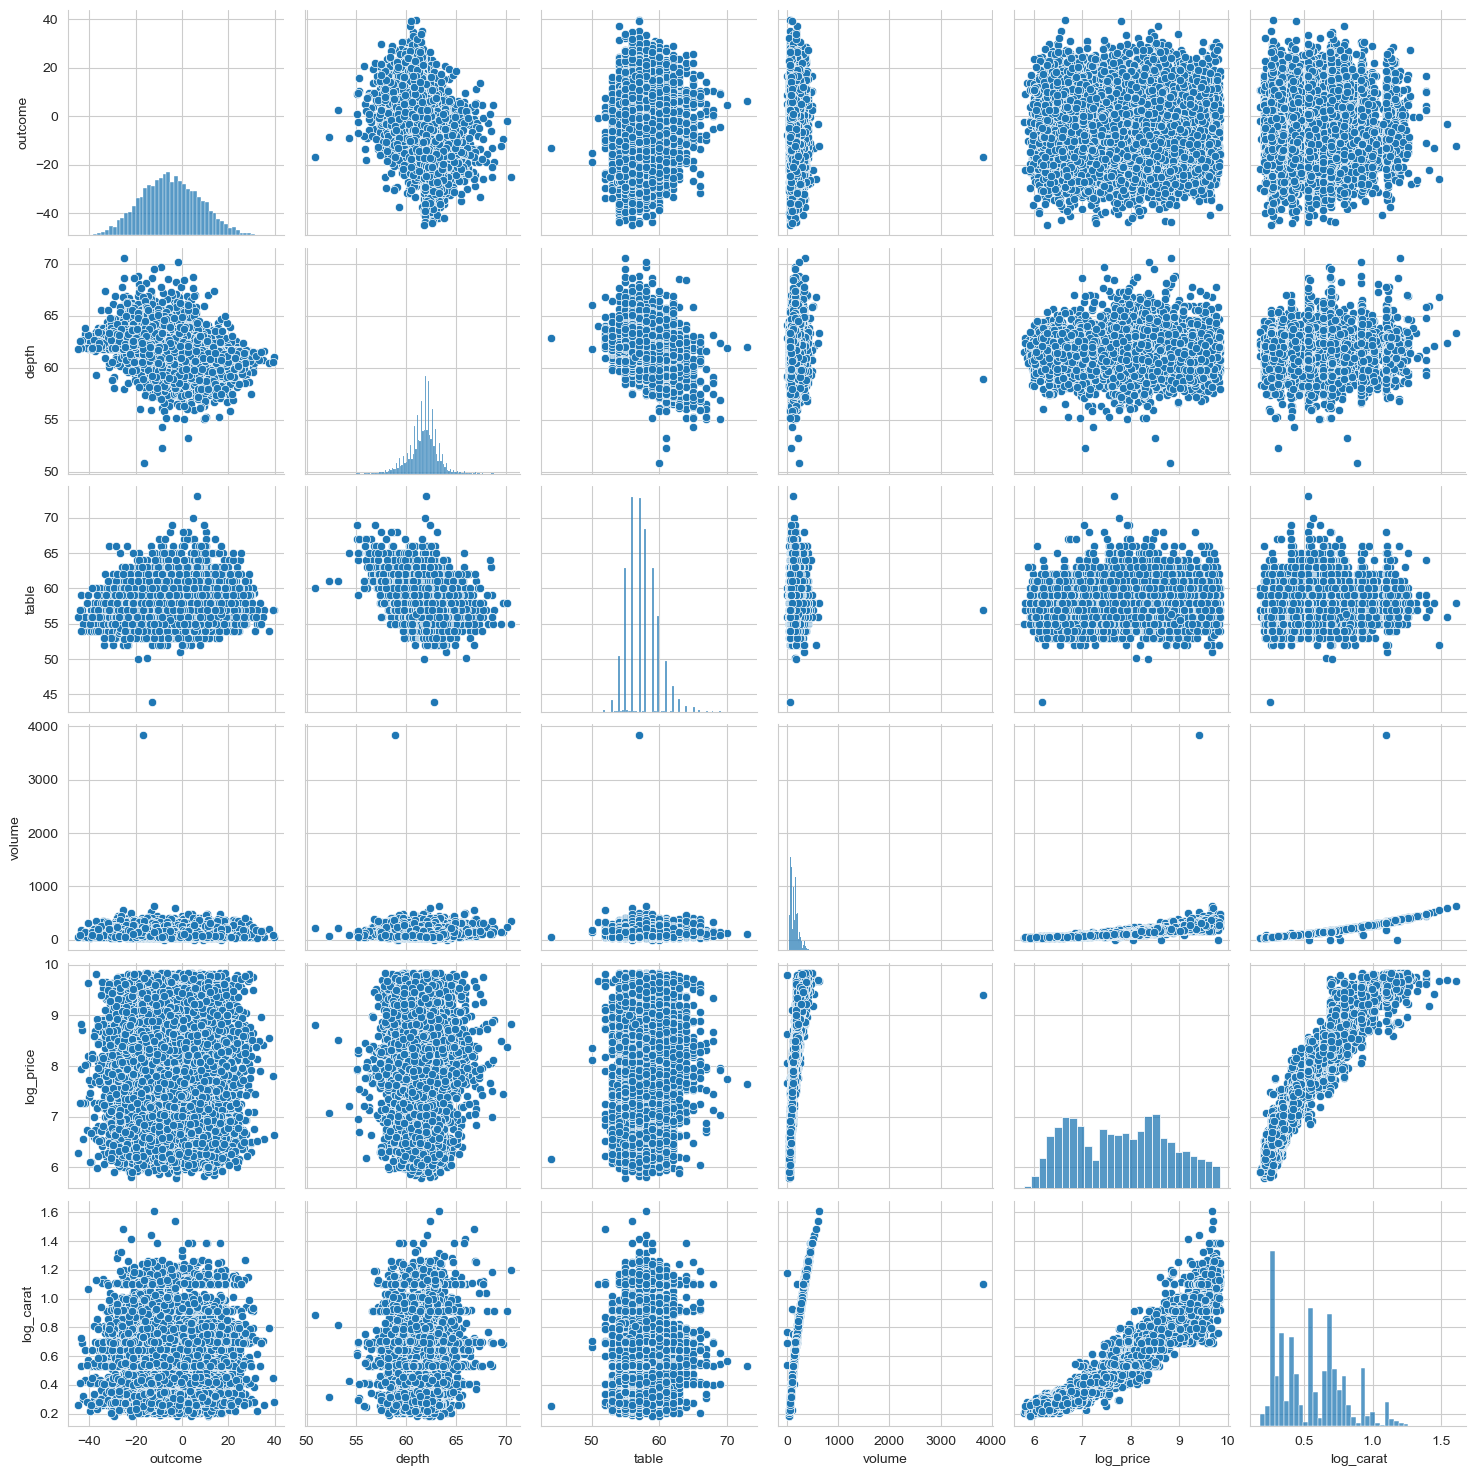

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x164274430> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
# Note: Replace '../CW1_train.csv' with your actual dataset filename if different.
df_scatter = pd.read_csv('CW1_transformed.csv')
df_scatter.columns

# 5. Scatter Plot to Visualize Relationships
sns.pairplot(df_scatter, vars=['outcome','depth', 'table',  'volume', 'log_price', 'log_carat'])
plt.show()


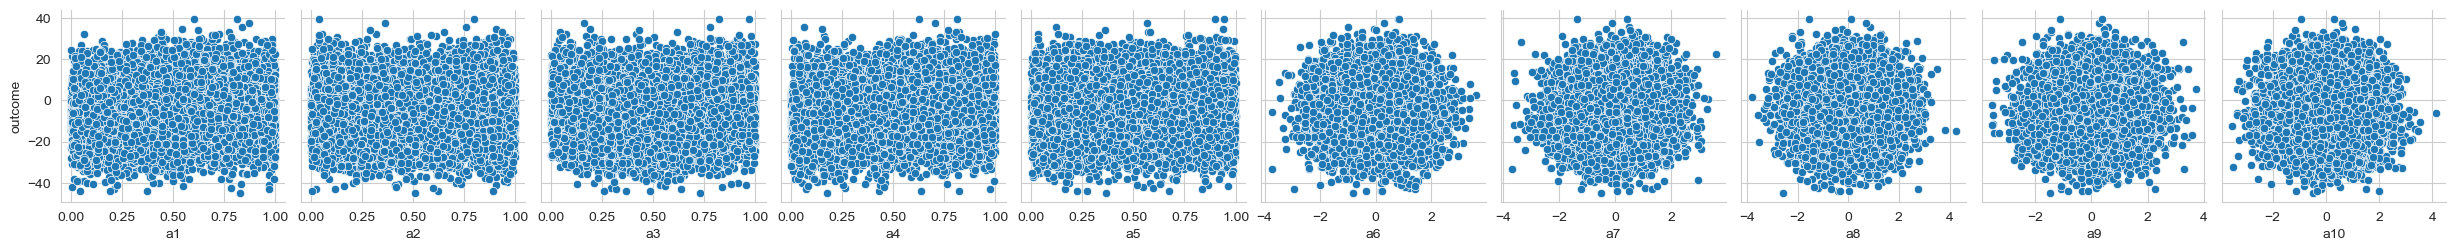

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_scatter, x_vars=['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10'], y_vars=['outcome'])
plt.show()


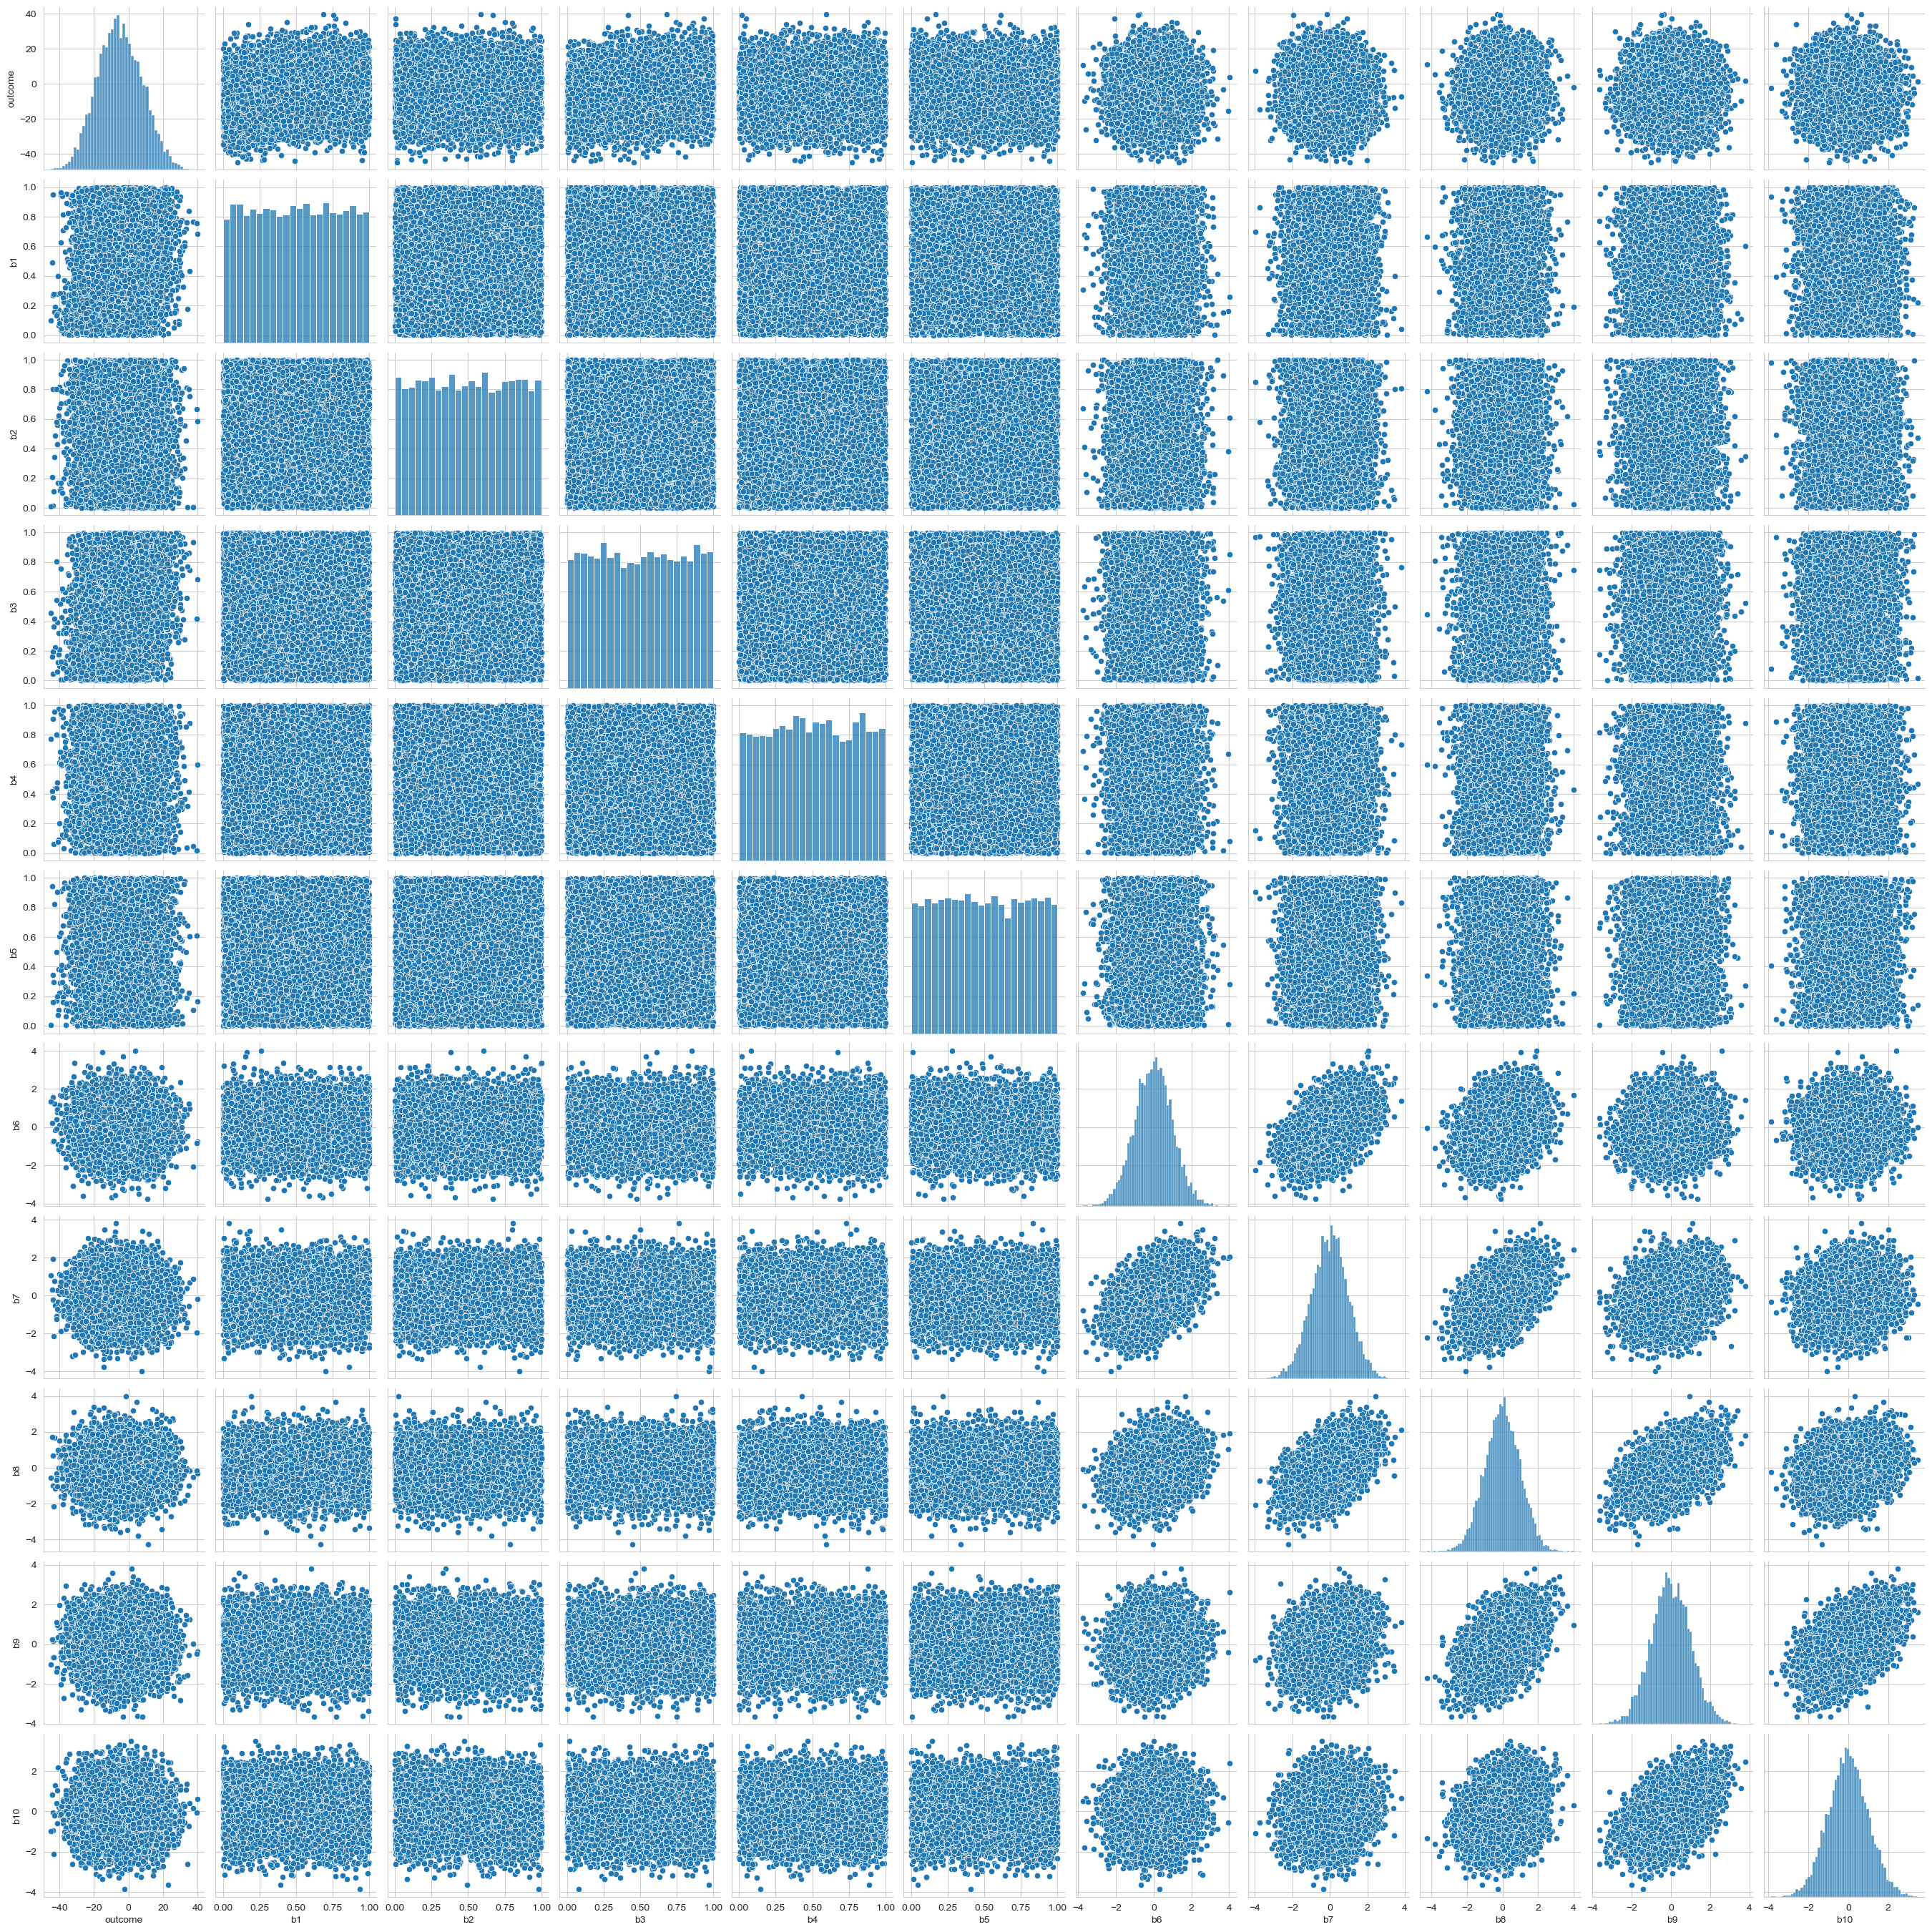

In [28]:
sns.pairplot(df_scatter, vars=['outcome','b1', 'b2', 'b3', 'b4', 'b5','b6', 'b7', 'b8', 'b9','b10'])
plt.show()

## 3.0 Exploratory Data Analysis (EDA)

### 3.1 Univariate Analysis

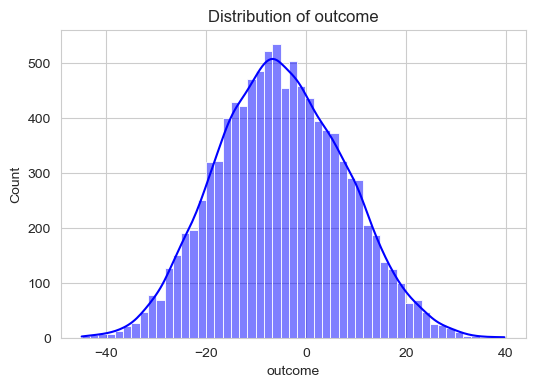

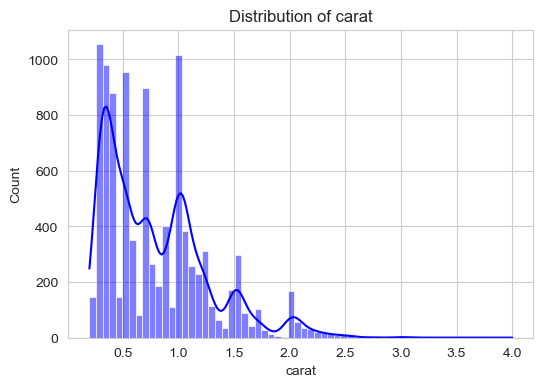

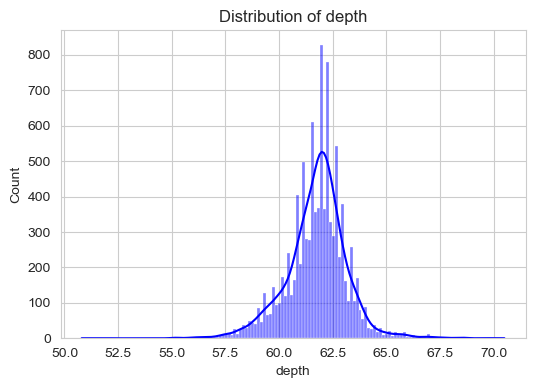

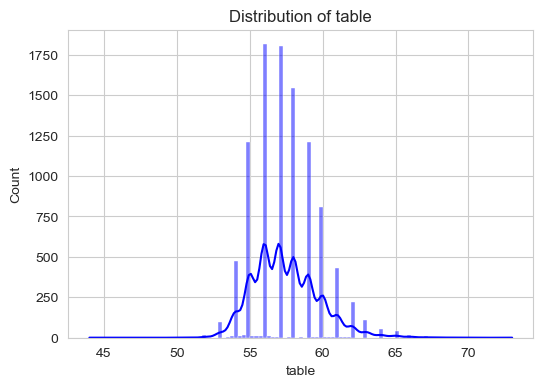

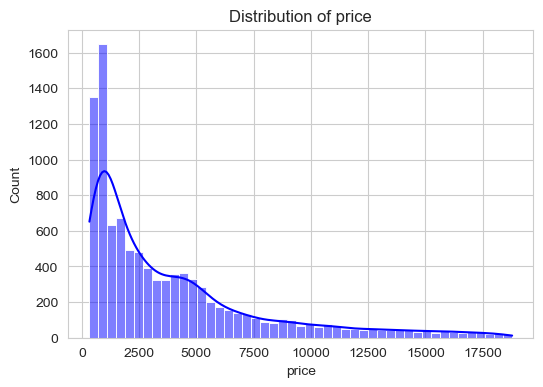

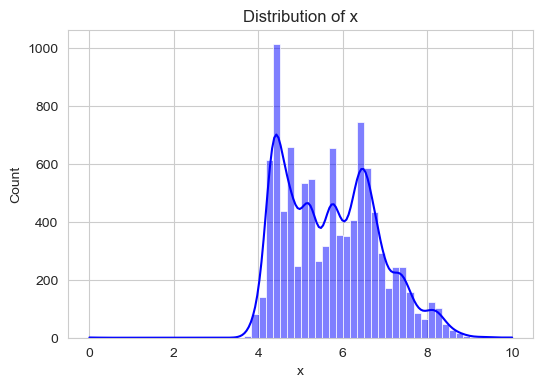

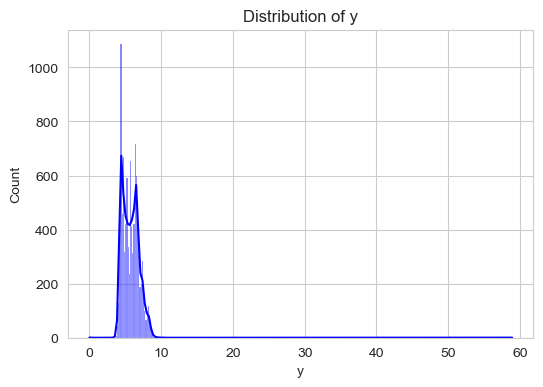

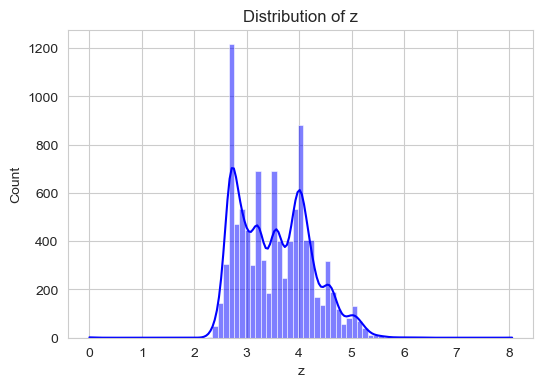

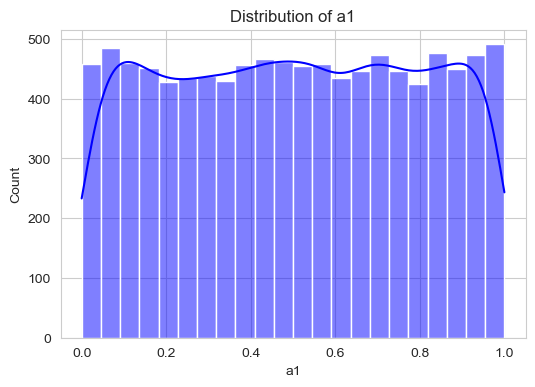

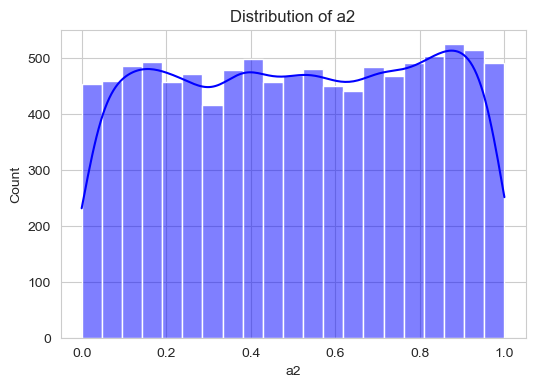

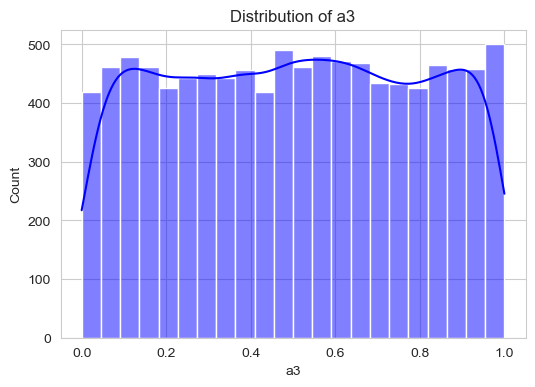

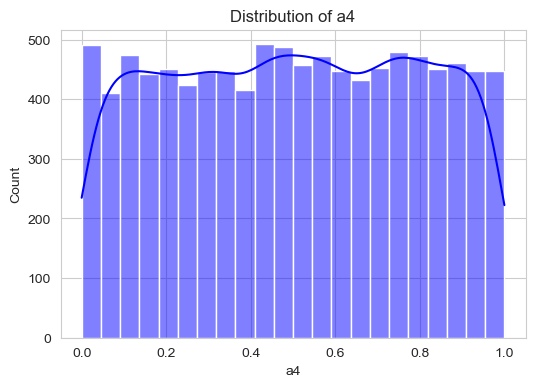

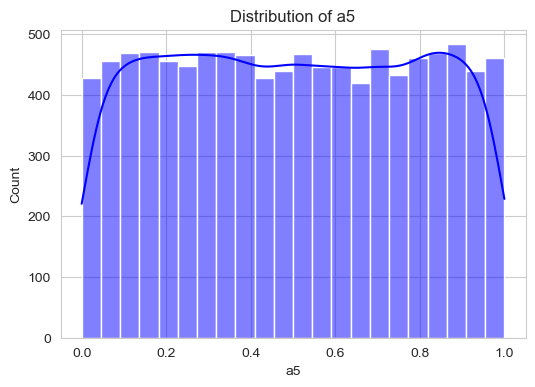

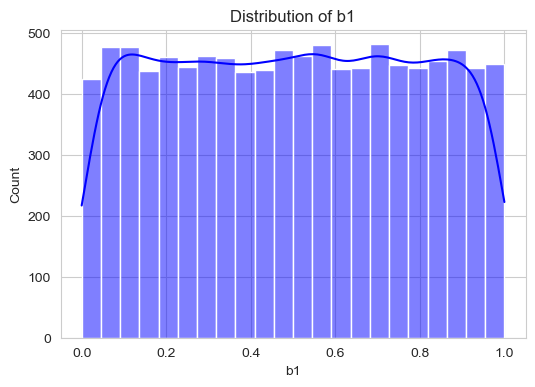

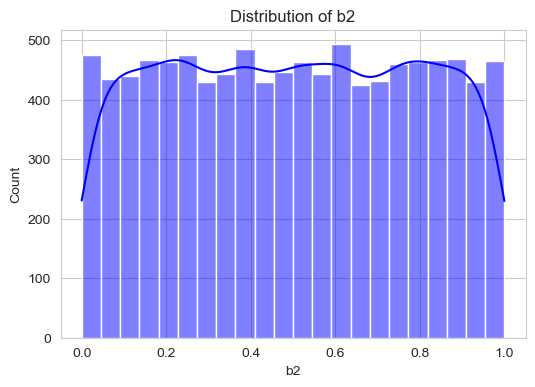

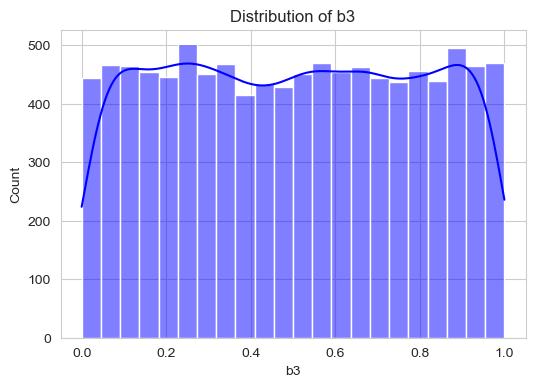

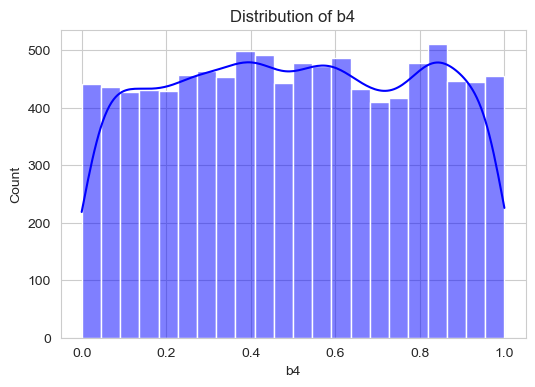

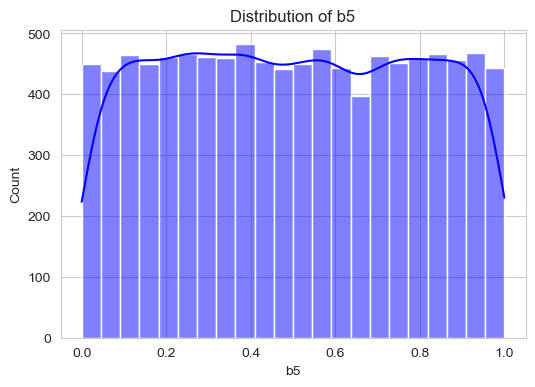

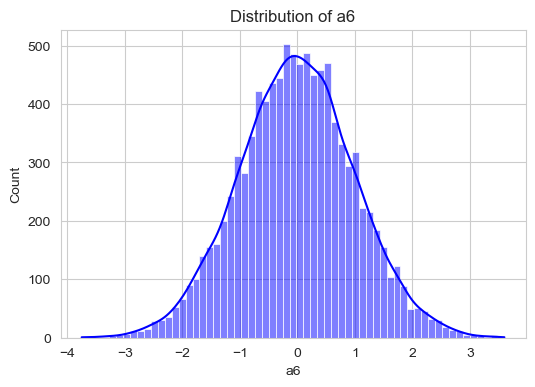

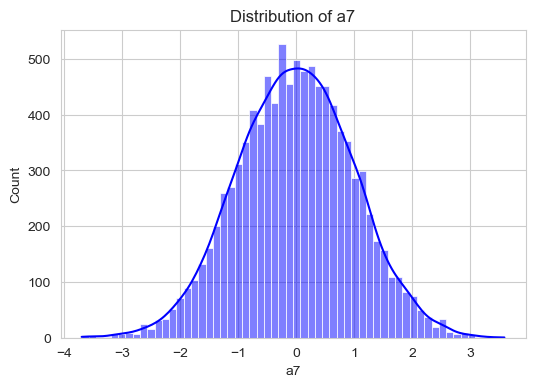

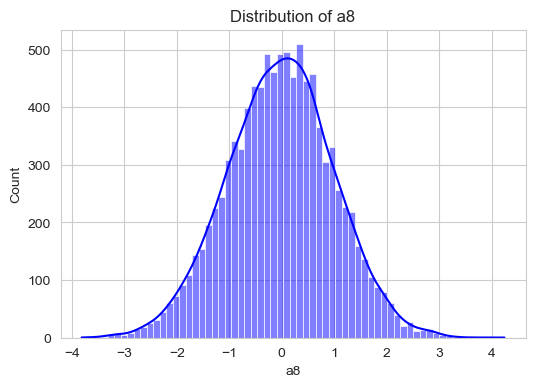

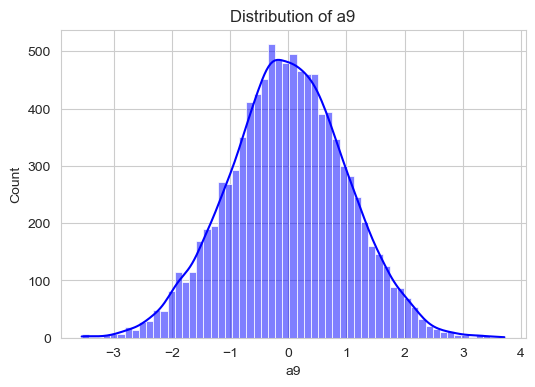

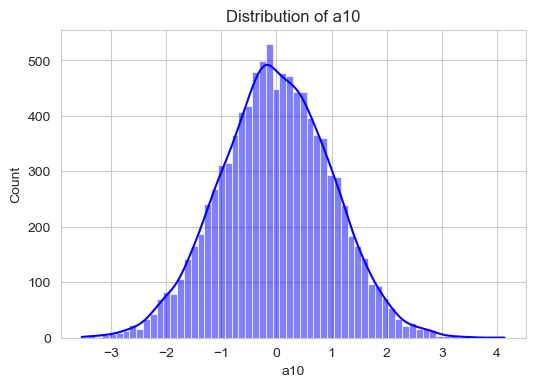

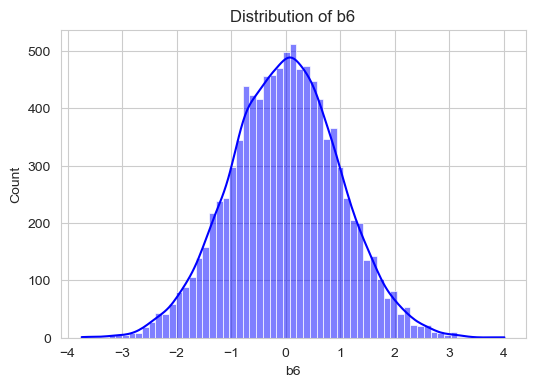

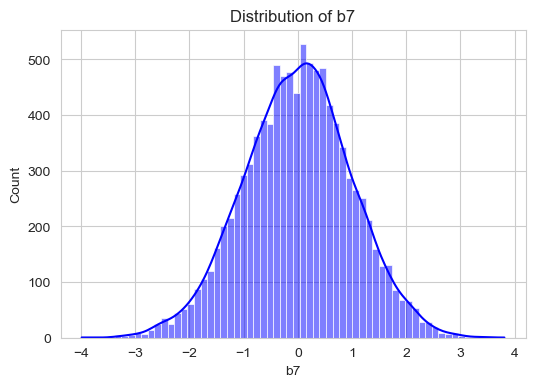

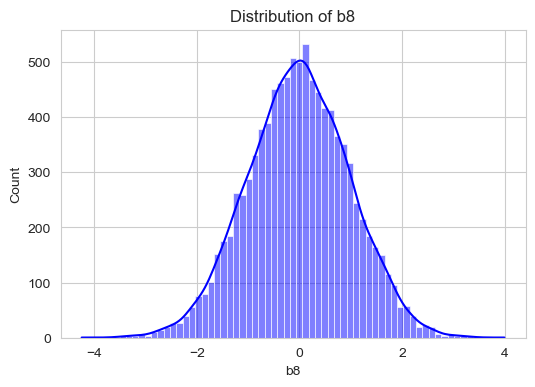

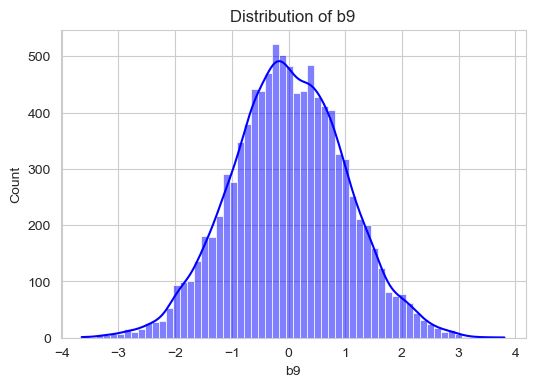

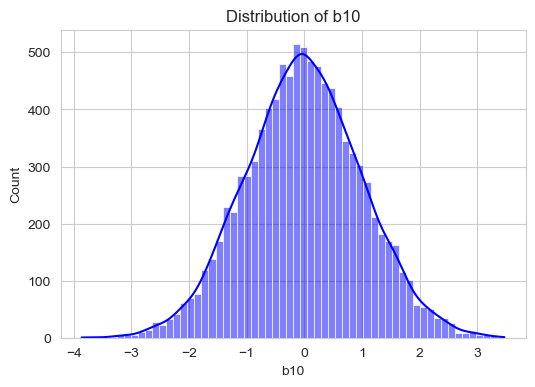

In [11]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, kde=True, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()

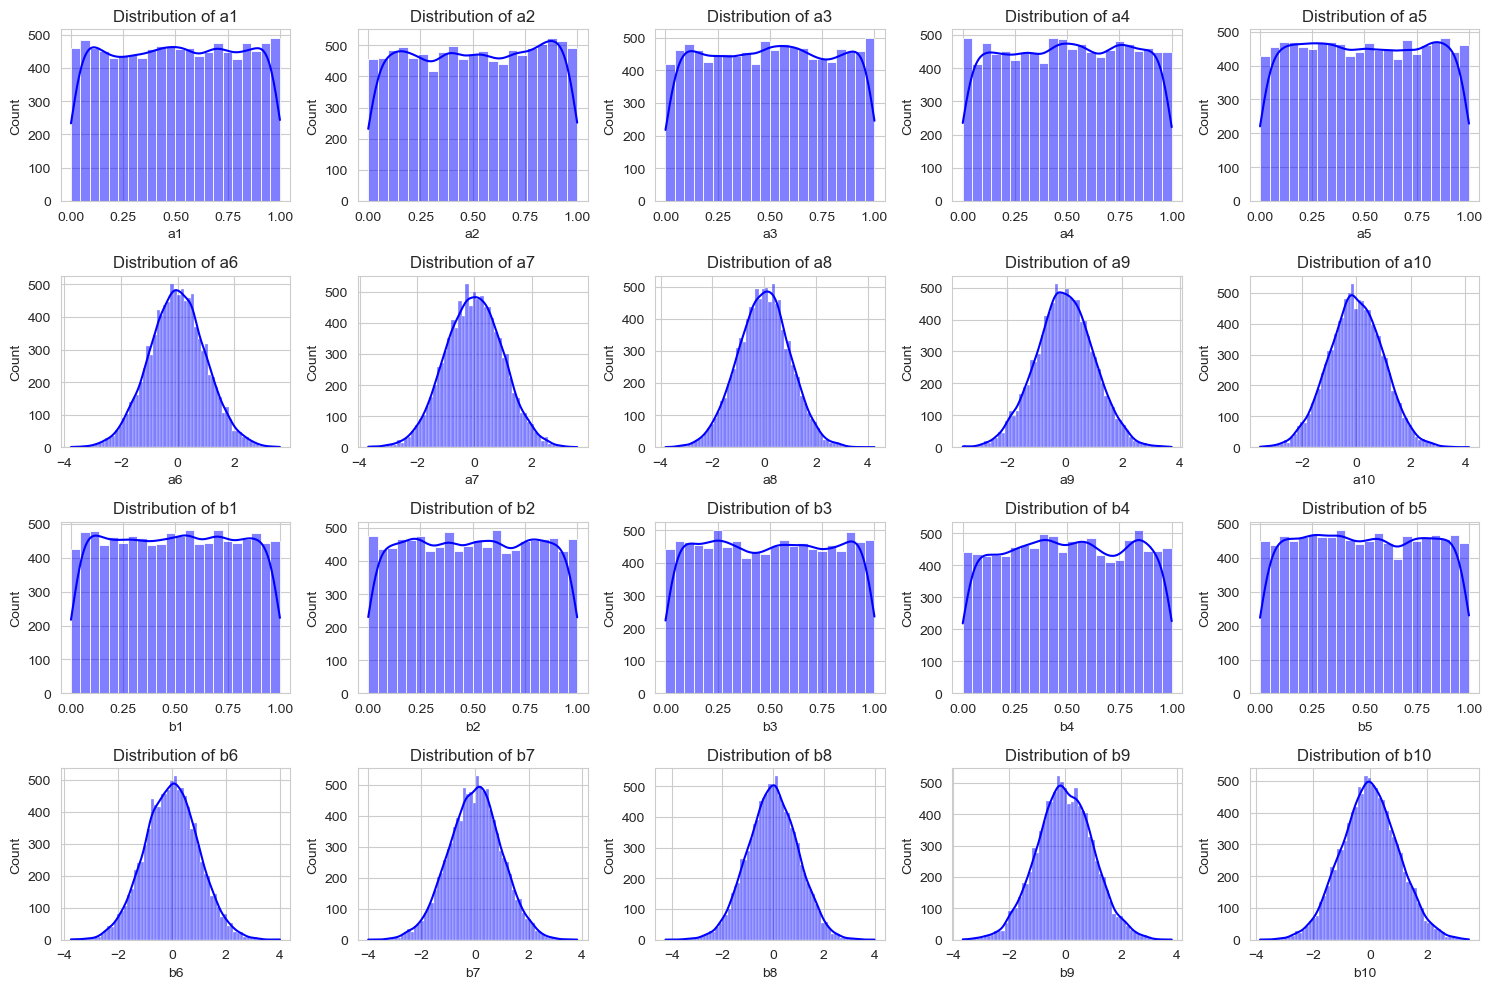

In [29]:
# Select relevant features for visualization
features_to_plot = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 
                    'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10']

# Filter only the selected features
df_features = df[features_to_plot]

# Plot all selected features in a grid
num_features = len(features_to_plot)
cols = 5  # Number of columns in the grid
rows = (num_features // cols) + (num_features % cols > 0)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()

# Generate histograms for each feature
for i, col in enumerate(features_to_plot):
    sns.histplot(df_features[col], kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f"Distribution of {col}")

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show
plt.tight_layout()
plt.show()


### 3.2 Multivariate Analysis

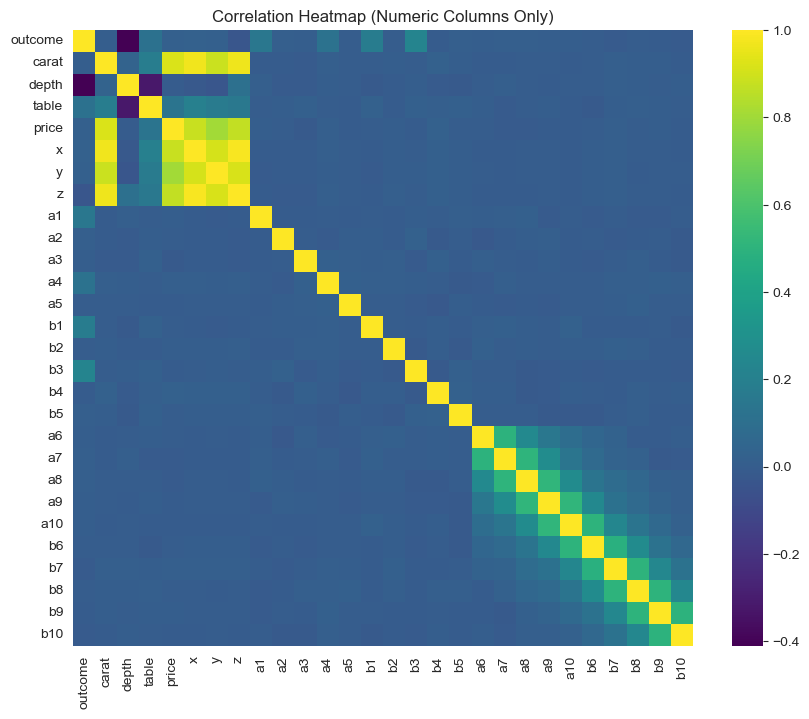

In [13]:
import numpy as np

# Keep only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Then compute correlation
corr_matrix = numeric_df.corr()

# Plot heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, cmap='viridis')
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()



In [ ]:
# Reduced as these have no linear or no non linear features with outcome
df_transformed = pd.read_csv('CW1_transformed.csv')

df_Reduced = df.drop(columns=['a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5'])

df_Reduced.to_csv('CW1_Reduced.csv', index=False)
print("Reduced dataset saved as 'CW1_Reduced.csv'.")
